In [20]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


In [21]:
species_df = pd.read_csv('data/species.csv')
species_df.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_15776\2355776894.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  species_df = pd.read_csv('data/species.csv')


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [22]:
parks_df = pd.read_csv('data/parks.csv')
parks_df.head()


,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [23]:
#EDA

#find out many parks this data set covers and how many obersation per park

grouped_parks = species_df.groupby('Park Name').size().reset_index(name='Count')

#unique_parks['percentage'] = unique_parks["observations"] / unique_parks["observations"].sum()*100

print(grouped_parks)



                                         Park Name  Count
0                             Acadia National Park   1709
1                             Arches National Park   1048
2                           Badlands National Park   1389
3                           Big Bend National Park   2269
4                           Biscayne National Park   1726
5       Black Canyon of the Gunnison National Park   1106
6                       Bryce Canyon National Park   1286
7                        Canyonlands National Park   1223
8                       Capitol Reef National Park   1566
9                   Carlsbad Caverns National Park   1536
10                   Channel Islands National Park   1885
11                          Congaree National Park   2321
12                       Crater Lake National Park   3760
13                   Cuyahoga Valley National Park   1941
14                      Death Valley National Park   4439
15               Denali National Park and Preserve   1320
16            

In [24]:
grouped_parks[grouped_parks["Park Name"] == "Arches National Park"]

,Park Name,Count
1,Arches National Park,1048


In [25]:
parks_df[parks_df["Park Name"] == 'Arches National Park']["State"]

grouped_parks = grouped_parks.merge(parks_df[['Park Name', "State"]], on ='Park Name', how = "left")

grouped_parks.sort_values(by='Count',ascending=True)

,Park Name,Count,State
16,Dry Tortugas National Park,848,FL
42,Petrified Forest National Park,853,AZ
24,Great Sand Dunes National Park and Preserve,952,CO
34,Kobuk Valley National Park,1025,AK
1,Arches National Park,1048,UT
33,Kenai Fjords National Park,1057,AK
5,Black Canyon of the Gunnison National Park,1106,CO
49,Theodore Roosevelt National Park,1165,ND
7,Canyonlands National Park,1223,UT
32,Katmai National Park and Preserve,1225,AK


In [26]:
grouped_parks.sort_values("State")

,Park Name,Count,State
18,Gates Of The Arctic National Park and Preserve,1353,AK
52,Wrangell - St Elias National Park and Preserve,1796,AK
35,Lake Clark National Park and Preserve,2007,AK
15,Denali National Park and Preserve,1320,AK
34,Kobuk Valley National Park,1025,AK
33,Kenai Fjords National Park,1057,AK
32,Katmai National Park and Preserve,1225,AK
19,Glacier Bay National Park and Preserve,1957,AK
29,Hot Springs National Park,1950,AR
21,Grand Canyon National Park,2622,AZ


In [27]:
state_spread = grouped_parks.groupby('State')['Count'].sum().reset_index()

state_spread.columns = ["State", 'Observation']

state_spread.sort_values(by="Observation")

,State,Observation
13,ND,1165
10,MI,1397
11,MN,1453
14,NM,1536
9,ME,1709
16,OH,1941
1,AR,1950
25,WY,2030
18,SC,2321
8,KY,2499


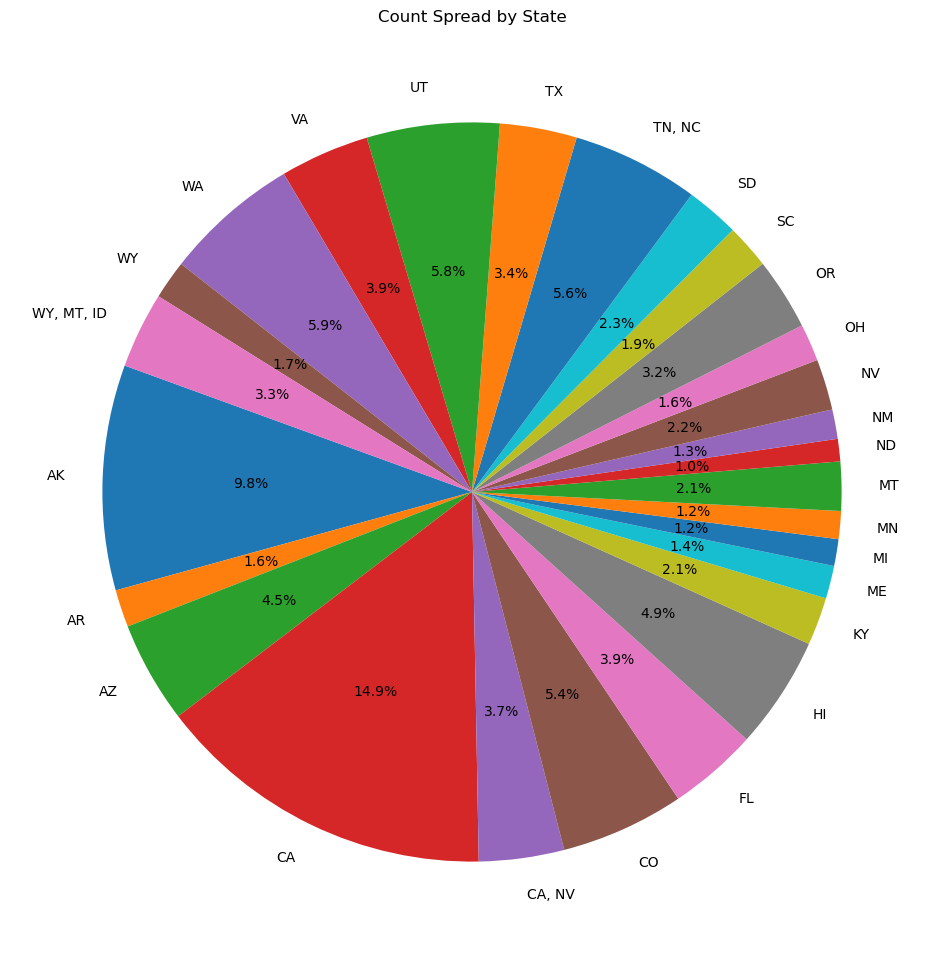

In [28]:
plt.figure(figsize=(12, 12))
plt.pie(state_spread['Observation'], labels = state_spread['State'], autopct='%1.1f%%',startangle=160)
plt.title("Count Spread by State")
plt.show()

In [34]:
species_spread = species_df.groupby('Category').size().reset_index(name='Count')
print(species_spread)

               Category  Count
0                 Algae    976
1             Amphibian    743
2                  Bird  14601
3   Crab/Lobster/Shrimp    582
4                  Fish   3956
5                 Fungi   6203
6                Insect  14349
7          Invertebrate   1566
8                Mammal   3867
9     Nonvascular Plant   4278
10              Reptile   1343
11           Slug/Snail    787
12      Spider/Scorpion    776
13       Vascular Plant  65221


<BarContainer object of 14 artists>

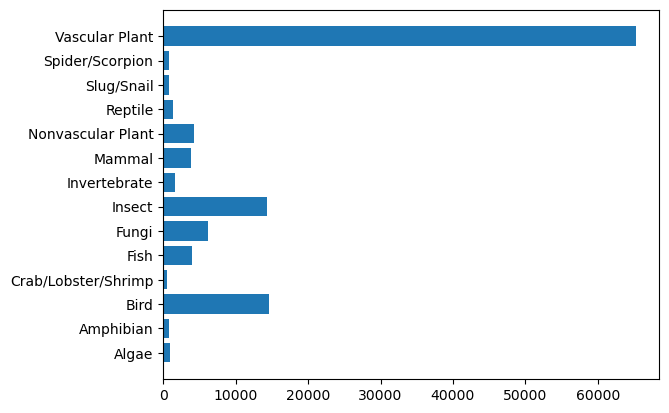

In [51]:
plt.barh(width = species_spread["Count"], y = species_spread["Category"])

               Category      0
0                 Algae    976
1             Amphibian    743
2                  Bird  14601
3   Crab/Lobster/Shrimp    582
4                  Fish   3956
5                 Fungi   6203
6                Insect  14349
7          Invertebrate   1566
8                Mammal   3867
9     Nonvascular Plant   4278
10              Reptile   1343
11           Slug/Snail    787
12      Spider/Scorpion    776
13       Vascular Plant  65221
